In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import jpype
import math
if not jpype.isJVMStarted():
    jpype.startJVM()
import asposecells
from asposecells.api import Workbook, LoadOptions, SaveFormat, FileFormatType

In [3]:
path_str = str(os.getcwd())
path_str = path_str + '/SRS/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.csv' in i:
        dir_list.append(i)

In [4]:
if not jpype.isJVMStarted():
    jpype.startJVM()
path_str_tmp = str(os.getcwd())

path_str_tmp = path_str_tmp + '/Data_Excel/'
for f in os.listdir(path_str_tmp):
    os.remove(os.path.join(path_str_tmp, f))
    
for i in dir_list:
    name = path_str + i
    # Create CSV LoadOptions object
    loadOptions =  LoadOptions(FileFormatType.CSV)

    # Create a Workbook object with CSV file's path and the loadOptions
    workbook =  Workbook(name, loadOptions)

    # Save CSV as XLSX
    excel_name = path_str_tmp + i.split('.')[0] + ".xlsx" 

    workbook.save(excel_name , SaveFormat.XLSX)

In [5]:
path_str = str(os.getcwd())
path_str = path_str + '/Data_Excel/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.xlsx' in i:
        dir_list.append(i)

In [6]:
count = 0
df_master = pd.DataFrame()
for i in dir_list:
    name = path_str + i
    df_tmp = pd.read_excel(name)
    df_tmp = df_tmp.iloc[4:]
    if count == 0:
        df_master['Freq'] = df_tmp.iloc[:,0]
    
    col_name = 'CH3_Upper_Envelope_' + str(count) 
    count = count + 1
    df_master[col_name] = df_tmp.iloc[:,3]

In [7]:
df_master

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,CH3_Upper_Envelope_76,CH3_Upper_Envelope_77,CH3_Upper_Envelope_78,CH3_Upper_Envelope_79,CH3_Upper_Envelope_80,CH3_Upper_Envelope_81,CH3_Upper_Envelope_82,CH3_Upper_Envelope_83,CH3_Upper_Envelope_84,CH3_Upper_Envelope_85
4,0.481281,0.172165,0.032615,0.051747,0.062659,0.06108,0.109647,0.115471,0.097991,0.126526,...,0.117199,0.049449,0.041792,0.120389,0.100573,0.166334,0.117379,0.091546,0.143563,0.132377
5,0.488281,0.173309,0.032518,0.052507,0.062962,0.062516,0.10907,0.114803,0.098581,0.127284,...,0.121072,0.051117,0.041998,0.121514,0.10029,0.166989,0.116854,0.090915,0.144548,0.130734
6,0.495383,0.174381,0.032398,0.053265,0.063222,0.063972,0.108412,0.114082,0.099139,0.127994,...,0.124916,0.052788,0.04218,0.122445,0.099931,0.167906,0.116259,0.090246,0.145463,0.129027
7,0.502589,0.175376,0.032254,0.054019,0.063435,0.065445,0.107673,0.114018,0.099665,0.128656,...,0.128721,0.054413,0.042338,0.123171,0.099497,0.169666,0.115595,0.089541,0.146306,0.127263
8,0.509899,0.17629,0.032086,0.05477,0.0636,0.066933,0.106855,0.114085,0.100159,0.129267,...,0.132479,0.055986,0.04247,0.123676,0.098984,0.171397,0.114863,0.088803,0.147081,0.126157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,458.502,5.134517,0.500866,2.063679,2.451554,3.68236,2.331534,4.96046,2.65599,4.300077,...,63.34087,2.259311,6.135234,15.89535,7.587361,7.089573,11.84475,7.885828,6.221703,16.41575
480,465.1711,5.189568,0.478748,2.027465,2.405158,3.70866,2.276621,5.010504,2.600572,4.25337,...,61.49543,2.124802,5.999578,15.9549,7.142429,6.822333,12.10984,7.493089,6.168709,15.36276
481,471.9371,5.181171,0.454824,1.973915,2.361946,3.727211,2.205099,5.045694,2.53388,4.208174,...,59.52922,1.979737,5.801418,15.99508,6.916826,6.945186,12.19192,7.460626,6.149826,14.47953
482,478.8016,5.10953,0.429437,1.958838,2.318728,3.737113,2.118083,5.066922,2.459109,4.164173,...,57.44297,1.825188,5.549258,15.99067,6.886349,7.174019,12.10272,7.508355,6.037206,13.73711


In [8]:
k_val = float(input('Please enter k value. \n'))

Please enter k value. 
1.67


In [9]:
mean_lst = []
std_lst = []
upper_limit = []
for i in range(0,len(df_master)):
    mean_val = statistics.mean(df_master.iloc[i,1:])
    mean_lst.append(mean_val)
    std_val = statistics.stdev(df_master.iloc[i,1:])
    std_lst.append(std_val)
    
    upper_val = mean_val + (k_val * std_val)
    
    upper_limit.append(upper_val)

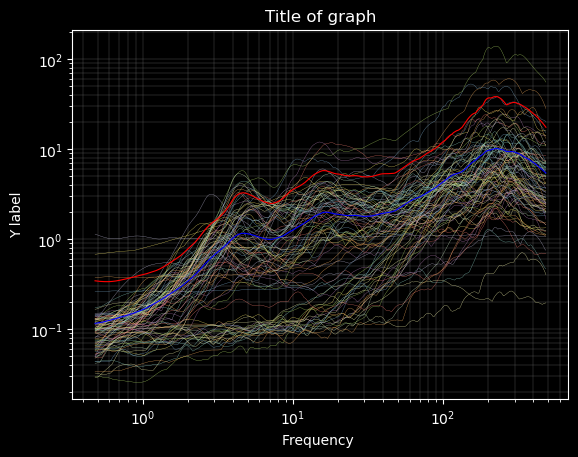

<Figure size 640x480 with 0 Axes>

In [10]:
plt.style.use('dark_background')
for i in df_master.columns:
    if 'Freq' not in i:
        x = df_master['Freq']
        y = df_master[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master['Freq']
y = upper_limit
plt.loglog(x, y, linewidth=0.8, color = "red")

x = df_master['Freq']
y = mean_lst
plt.loglog(x, y, linewidth=0.8, color = "blue")

plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
plt.grid(True,which='both',linewidth=0.2,color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Graphs/full_graph.png'
fig1.savefig(path_str_tmp, dpi=2000)

In [11]:
mean_lst_200 = []
std_lst_200 = []
upper_limit_200 = []
lower_limit_200 = []
df_master_200 = df_master[df_master['Freq']<200.0001]
for i in range(0,len(df_master_200)):
    mean_val = statistics.mean(df_master_200.iloc[i,1:])
    mean_lst_200.append(mean_val)
    std_val = statistics.stdev(df_master_200.iloc[i,1:])
    std_lst_200.append(std_val)

    upper_val = mean_val + (k_val * std_val)
    lower_val = mean_val - (k_val * std_val)

    upper_limit_200.append(upper_val)
    lower_limit_200.append(lower_val)

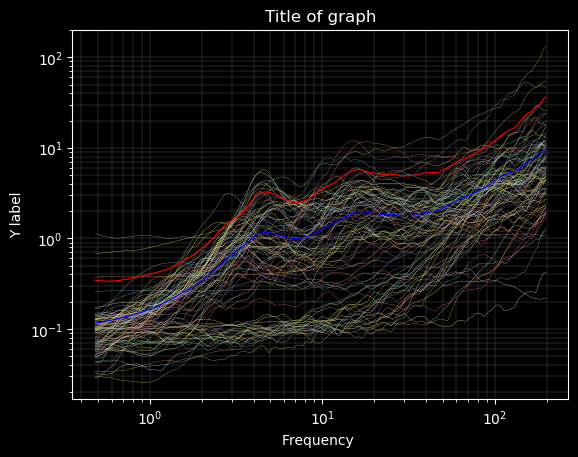

<Figure size 640x480 with 0 Axes>

In [12]:
plt.style.use('dark_background')

for i in df_master_200.columns:
    if 'Freq' not in i :
        x = df_master_200['Freq']
        y = df_master_200[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master_200['Freq']
y = upper_limit_200
plt.loglog(x, y, linewidth=0.8, color = "red")

x = df_master_200['Freq']
y = mean_lst_200
plt.loglog(x, y, linewidth=0.8, color = "blue")

plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
plt.grid(True,which='both',linewidth=0.2,color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Graphs/200_graph.png'
fig1.savefig(path_str_tmp, dpi=2000)

In [13]:
df_master = df_master.reset_index(drop=True)

In [14]:
df_master['average'] = mean_lst
df_master['upper'] = upper_limit

In [15]:
df_master.loc[len(df_master)] = 0
df_master.loc[len(df_master)] = 0

In [16]:
count = 0
for j in df_master.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master)-3):
            up_val1 = df_master.iloc[i][j]
            up_val2 = df_master.iloc[i+1][j]
            frq_val1 = df_master.iloc[i][0]
            frq_val2 = df_master.iloc[i+1][0]
            val_list.append(0.5*(up_val1+up_val2)/(frq_val1/frq_val2))
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        if 'average' in j:
            col_name = 'average_val'
        if 'upper' in j:
            col_name = 'upper_val'
        df_master.loc[:,col_name]= pd.Series(val_list)
#         df_master[col_name] = pd.Series(val_list)

In [17]:
df_master

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,Val_78,Val_79,Val_80,Val_81,Val_82,Val_83,Val_84,Val_85,average_val,upper_val
0,0.481281,0.172165,0.032615,0.051747,0.062659,0.06108,0.109647,0.115471,0.097991,0.126526,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.488281,0.173309,0.032518,0.052507,0.062962,0.062516,0.10907,0.114803,0.098581,0.127284,...,0.042504,0.122711,0.101892,0.169086,0.118820,0.092558,0.146151,0.133469,0.117950,0.348896
2,0.495383,0.174381,0.032398,0.053265,0.063222,0.063972,0.108412,0.114082,0.099139,0.127994,...,0.042701,0.123754,0.101567,0.169883,0.118252,0.091898,0.147115,0.131770,0.118326,0.347805
3,0.502589,0.175376,0.032254,0.054019,0.063435,0.065445,0.107673,0.114018,0.099665,0.128656,...,0.042874,0.124594,0.101164,0.171241,0.117613,0.091201,0.148006,0.130009,0.118739,0.346770
4,0.509899,0.17629,0.032086,0.05477,0.0636,0.066933,0.106855,0.114085,0.100159,0.129267,...,0.043021,0.125219,0.100684,0.173012,0.116905,0.090469,0.148827,0.128553,0.119188,0.345788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,471.9371,5.181171,0.454824,1.973915,2.361946,3.727211,2.205099,5.045694,2.53388,4.208174,...,5.986322,16.207349,7.131875,6.983885,12.327617,7.585610,6.248855,15.138176,5.784198,19.135047
478,478.8016,5.10953,0.429437,1.958838,2.318728,3.737113,2.118083,5.066922,2.459109,4.164173,...,5.757888,16.225497,7.001974,7.162287,12.324007,7.593355,6.182148,14.313531,5.667404,18.562449
479,485.766,4.982316,0.403019,1.940557,2.2729,3.739693,2.01818,5.076493,2.385319,4.121445,...,5.482751,16.193414,6.967002,7.398925,12.164537,7.638633,6.026711,13.615094,5.553145,17.979430
480,0,0,0,0,0,0,0,0,0,0,...,1077.603218,3543.265470,1666.373770,1832.118707,2664.643733,1365.902147,1771.091656,3197.183235,1317.401585,4195.376332


In [18]:
# mean_val = statistics.mean(mean_lst)
# mean_sqrt = statistics.sqrt(mean_val)
# mean_lst.append(mean_val)
# mean_lst.append(mean_sqrt)

# mean_val = statistics.mean(upper_limit)
# mean_sqrt = statistics.sqrt(mean_val)
# upper_limit.append(mean_val)
# upper_limit.append(mean_sqrt)

# df_master['average'] = mean_lst
# df_master['upper'] = upper_limit

In [19]:
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_full.xlsx'
df_master.to_excel(path_str_tmp,index=False)

path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_full.csv'
df_master.to_csv(path_str_tmp,index=False)

In [20]:
df_master_200

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,CH3_Upper_Envelope_76,CH3_Upper_Envelope_77,CH3_Upper_Envelope_78,CH3_Upper_Envelope_79,CH3_Upper_Envelope_80,CH3_Upper_Envelope_81,CH3_Upper_Envelope_82,CH3_Upper_Envelope_83,CH3_Upper_Envelope_84,CH3_Upper_Envelope_85
4,0.481281,0.172165,0.032615,0.051747,0.062659,0.06108,0.109647,0.115471,0.097991,0.126526,...,0.117199,0.049449,0.041792,0.120389,0.100573,0.166334,0.117379,0.091546,0.143563,0.132377
5,0.488281,0.173309,0.032518,0.052507,0.062962,0.062516,0.10907,0.114803,0.098581,0.127284,...,0.121072,0.051117,0.041998,0.121514,0.10029,0.166989,0.116854,0.090915,0.144548,0.130734
6,0.495383,0.174381,0.032398,0.053265,0.063222,0.063972,0.108412,0.114082,0.099139,0.127994,...,0.124916,0.052788,0.04218,0.122445,0.099931,0.167906,0.116259,0.090246,0.145463,0.129027
7,0.502589,0.175376,0.032254,0.054019,0.063435,0.065445,0.107673,0.114018,0.099665,0.128656,...,0.128721,0.054413,0.042338,0.123171,0.099497,0.169666,0.115595,0.089541,0.146306,0.127263
8,0.509899,0.17629,0.032086,0.05477,0.0636,0.066933,0.106855,0.114085,0.100159,0.129267,...,0.132479,0.055986,0.04247,0.123676,0.098984,0.171397,0.114863,0.088803,0.147081,0.126157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,187.2884,6.956908,0.377869,3.463327,2.080194,6.830683,2.825883,10.506,5.255377,10.95323,...,107.9212,1.696284,6.073627,27.21373,7.050842,11.2575,18.91602,6.077021,11.21656,21.60162
418,190.0125,7.210338,0.39573,3.495232,2.108491,7.04813,3.005228,11.54191,5.360868,10.83112,...,116.0908,1.738472,6.032697,26.4569,7.161793,11.47436,18.72401,6.035206,10.96122,22.43823
419,192.7763,7.419187,0.408978,3.501088,2.138189,7.466325,3.181231,12.6092,5.415557,10.51196,...,123.1021,1.781695,5.881104,26.01126,7.316854,11.6293,18.44473,6.088926,11.04787,23.13686
420,195.5803,7.586823,0.417102,3.482797,2.169564,7.824549,3.352087,13.57835,5.411498,10.13612,...,128.6234,1.824777,5.831407,25.90955,7.432195,11.72871,18.05322,6.109012,11.09884,23.71349


In [21]:
df_master_200['average'] = mean_lst_200
df_master_200['upper'] = upper_limit_200

C:\Users\omkarkhanvilkar\AppData\Local\Temp\ipykernel_1256\313770749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_200['average'] = mean_lst_200
C:\Users\omkarkhanvilkar\AppData\Local\Temp\ipykernel_1256\313770749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_200['upper'] = upper_limit_200


In [22]:
df_master_200 = df_master_200.reset_index(drop=True)
df_master_200.loc[len(df_master_200)] = 0
df_master_200.loc[len(df_master_200)] = 0

In [23]:
count = 0
for j in df_master_200.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master_200)-3):
            if df_master_200['Freq'][i] < 200.0001:
                up_val1 = df_master_200.iloc[i][j]
                up_val2 = df_master_200.iloc[i+1][j]
                frq_val1 = df_master_200.iloc[i][0]
                frq_val2 = df_master_200.iloc[i+1][0]
                val_list.append(0.5*(float(up_val1)+float(up_val2))/(frq_val1/frq_val2))
            else:
                break
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        if 'average' in j:
            col_name = 'average_val'
        if 'upper' in j:
            col_name = 'upper_val'
        df_master_200.loc[:,col_name]= pd.Series(val_list)

In [24]:
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_200.xlsx'
df_master_200.to_excel(path_str_tmp,index=False)

path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_200.csv'
df_master_200.to_csv(path_str_tmp,index=False)

In [25]:
df_master_200

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,Val_78,Val_79,Val_80,Val_81,Val_82,Val_83,Val_84,Val_85,average_val,upper_val
0,0.481281,0.172165,0.032615,0.051747,0.062659,0.06108,0.109647,0.115471,0.097991,0.126526,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.488281,0.173309,0.032518,0.052507,0.062962,0.062516,0.10907,0.114803,0.098581,0.127284,...,0.042504,0.122711,0.101892,0.169086,0.118820,0.092558,0.146151,0.133469,0.117950,0.348896
2,0.495383,0.174381,0.032398,0.053265,0.063222,0.063972,0.108412,0.114082,0.099139,0.127994,...,0.042701,0.123754,0.101567,0.169883,0.118252,0.091898,0.147115,0.131770,0.118326,0.347805
3,0.502589,0.175376,0.032254,0.054019,0.063435,0.065445,0.107673,0.114018,0.099665,0.128656,...,0.042874,0.124594,0.101164,0.171241,0.117613,0.091201,0.148006,0.130009,0.118739,0.346770
4,0.509899,0.17629,0.032086,0.05477,0.0636,0.066933,0.106855,0.114085,0.100159,0.129267,...,0.043021,0.125219,0.100684,0.173012,0.116905,0.090469,0.148827,0.128553,0.119188,0.345788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,192.7763,7.419187,0.408978,3.501088,2.138189,7.466325,3.181231,12.6092,5.415557,10.51196,...,6.043546,26.615664,7.344622,11.719856,18.854686,6.150241,11.164610,23.118998,9.406398,34.844585
416,195.5803,7.586823,0.417102,3.482797,2.169564,7.824549,3.352087,13.57835,5.411498,10.13612,...,5.941437,26.338008,7.481790,11.848880,18.514413,6.187681,11.234421,23.765903,9.576405,35.962805
417,198.4251,7.72279,0.419921,3.719325,2.205242,8.281791,3.51817,14.37521,5.493228,9.834708,...,5.889739,26.140001,7.511804,11.927412,18.048885,6.190481,11.270905,24.301914,9.697234,36.744689
418,0,0,0,0,0,0,0,0,0,0,...,615.442511,2104.188184,1006.799757,1026.708821,1708.642728,842.321589,1071.572276,1625.262064,783.353027,2294.025848
